Through this Web scraping assignment, I am going to analyze overall crime rate across the world which varies greatly from country to country and are influenced by many factors

In [2]:
# Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse
import numpy as np

In [3]:
#With requests.get we make sure the web page works and it is available to connect it. If the response is 200, the page will be connected correctly.
#Please refer the link for more deatils: https://www.rfc-editor.org/info/rfc9110.
url='https://worldpopulationreview.com/country-rankings/crime-rate-by-country'
response = requests.get(url)
response

<Response [200]>

In [4]:

# All information on the web page will be in the "soup" variable.

soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
# To print information inside the "soup" variable.

print (soup)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" fetchpriority="high" imagesrcset="/_next/image?url=%2Fsvg_placeholder.png&amp;w=1080&amp;q=75 1x, /_next/image?url=%2Fsvg_placeholder.png&amp;w=2048&amp;q=75 2x" rel="preload"/><link crossorigin="" data-precedence="next" href="/_next/static/css/19a1dc6f69396b66.css" rel="stylesheet"/><link as="script" crossorigin="" fetchpriority="low" href="/_next/static/chunks/webpack-cca1c671e558db3d.js" rel="preload"/><script async="" crossorigin="" src="/_next/static/chunks/fd9d1056-3d675e39bada3e1b.js"></script><script async="" crossorigin="" src="/_next/static/chunks/2472-ac5762f5819d2137.js"></script><script async="" crossorigin="" src="/_next/static/chunks/main-app-8ed6d57d180fb331.js"></script><script async="" src="/_next/static/chunks/5364-11b79cb01f7fa894.js"></script><script async="" src="/_next/static/chunks/8326-4110a1f21e45448a.js"></script><

In [6]:
with open('output.txt', 'w', encoding='utf-8') as file:
    file.write(str(soup))

In [7]:
# The original web page could have more than one table. In this case, it was chosen for the "2019 Forbes list". It is table 1 on the web page.
soup.find_all('div')[0]


<div class="relative lg:container lg:mx-auto"><div class="block bg-white lg:my-2"><nav class="navbar relative z-40 bg-white px-2 lg:flex lg:items-stretch" role="navigation"><div class="navbar-brand flex min-h-[3.25rem] shrink-0 items-center justify-between"><a class="navbar-item relative shrink-0 grow-0 p-2 text-base leading-normal lg:flex lg:items-center" href="/">World Population Review</a><a aria-expanded="false" aria-label="menu" class="space-y-1.5 px-2 lg:hidden" role="button"><span class="block h-0.5 w-6 bg-gray-600"></span><span class="block h-0.5 w-6 bg-gray-600"></span><span class="block h-0.5 w-6 bg-gray-600"></span></a></div><div class="overscroll-none lg:flex lg:shrink-0 lg:flex-grow lg:flex-row lg:items-stretch hidden" id="navbarNav"><div class="navbar-start flex flex-col lg:order-first lg:mr-auto lg:flex-row lg:items-stretch lg:justify-start"><div class="navbar-item px-3 py-2 leading-normal text-gray-600 lg:hidden"><form action="/search/" class="m-0" id="searchbox"><div c

In [8]:
table =soup.find_all('ol')[0]
print (table)

<ol class="m-0 list-inside"><li><a href="/countries/venezuela-population" to="[object Object]">Venezuela</a>: <!-- -->83.76<!-- --> <!-- --> <!-- -->🇻🇪</li><li><a href="/countries/papua-new-guinea-population" to="[object Object]">Papua New Guinea</a>: <!-- -->80.79<!-- --> <!-- --> <!-- -->🇵🇬</li><li><a href="/countries/south-africa-population" to="[object Object]">South Africa</a>: <!-- -->76.86<!-- --> <!-- --> <!-- -->🇿🇦</li><li><a href="/countries/afghanistan-population" to="[object Object]">Afghanistan</a>: <!-- -->76.31<!-- --> <!-- --> <!-- -->🇦🇫</li><li><a href="/countries/honduras-population" to="[object Object]">Honduras</a>: <!-- -->74.54<!-- --> <!-- --> <!-- -->🇭🇳</li><li><a href="/countries/guyana-population" to="[object Object]">Guyana</a>: <!-- -->68.74<!-- --> <!-- --> <!-- -->🇬🇾</li><li><a href="/countries/el-salvador-population" to="[object Object]">El Salvador</a>: <!-- -->67.79<!-- --> <!-- --> <!-- -->🇸🇻</li><li><a href="/countries/brazil-population" to="[object O

In [9]:
#extract the data through for loop and save the data in the list
data = []
for row in table.find_all('li'):
    cells = row.find_all(['a'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

In [10]:
test = pd.DataFrame(data)
print(data)

[['Venezuela'], ['Papua New Guinea'], ['South Africa'], ['Afghanistan'], ['Honduras'], ['Guyana'], ['El Salvador'], ['Brazil'], ['Jamaica'], ['Syria']]


In [11]:
data = []
for li in table.find_all('li'):  # Assuming you have a BeautifulSoup object named 'table'
    cells = li.find_all('a')  # Find all <a> tags within <li> elements
    li_data = [cell.get_text(strip=True) for cell in cells]
    data.append(li_data)

In [12]:
test = pd.DataFrame(data)
print(data)

[['Venezuela'], ['Papua New Guinea'], ['South Africa'], ['Afghanistan'], ['Honduras'], ['Guyana'], ['El Salvador'], ['Brazil'], ['Jamaica'], ['Syria']]


In [13]:
ct = []
rows = soup.find_all('tr')  # Assuming you have a BeautifulSoup object named 'soup'

for row in rows:
    cells = row.find_all('td', class_='z-40 border px-2 py-0.5')
    row_data1 = [cell.get_text(strip=True) for cell in cells]
    ct.append(row_data1)

In [14]:
ct=[]
for row in row.find_all('td',class_='z-40 border px-2 py-0.5'):
    #cells = row.find_all('td')
    row_data1 = [cell.get_text(strip=True) for cell in row]
    ct.append(row_data1)

In [15]:
test=pd.DataFrame(ct)
ct

[['12.13']]

In [16]:
# To filter lines (th) where the column titles are

C_rate = pd.DataFrame(data)
C_rate

,0
0,Venezuela
1,Papua New Guinea
2,South Africa
3,Afghanistan
4,Honduras
5,Guyana
6,El Salvador
7,Brazil
8,Jamaica
9,Syria


In [17]:
table_c = soup.find_all('p')[5]
print(table_c)

<p class="m-0 p-0 text-xs leading-4">50</p>


In [18]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

In [19]:
ct_c = []
rows = soup.find_all('tr')  # Assuming you have a BeautifulSoup object named 'soup'

for row in rows:
    cells = row.find_all('th')
    row_data1 = [cell.get_text(strip=True) for cell in cells]
    ct_c.append(row_data1)

In [20]:
test=pd.DataFrame(ct_c)
ct_c

[['Country', 'Crime Index'],
 ['Venezuela'],
 ['Papua New Guinea'],
 ['South Africa'],
 ['Afghanistan'],
 ['Honduras'],
 ['Guyana'],
 ['El Salvador'],
 ['Brazil'],
 ['Jamaica'],
 ['Syria'],
 ['Peru'],
 ['Angola'],
 ['Cameroon'],
 ['Namibia'],
 ['Nigeria'],
 ['Bangladesh'],
 ['Argentina'],
 ['Puerto Rico'],
 ['Bahamas'],
 ['Libya'],
 ['Dominican Republic'],
 ['Kenya'],
 ['Belarus'],
 ['Zimbabwe'],
 ['Guatemala'],
 ['Bolivia'],
 ['Fiji'],
 ['Malaysia'],
 ['Colombia'],
 ['Kyrgyzstan'],
 ['Uganda'],
 ['Somalia'],
 ['Mongolia'],
 ['Tanzania'],
 ['Maldives'],
 ['Ecuador'],
 ['Costa Rica'],
 ['Mexico'],
 ['Kazakhstan'],
 ['Chile'],
 ['Botswana'],
 ['Algeria'],
 ['France'],
 ['Uruguay'],
 ['Cambodia'],
 ['Belize'],
 ['Iran'],
 ['Paraguay'],
 ['Ethiopia'],
 ['Mauritius'],
 ['Morocco'],
 ['Iraq'],
 ['Sweden'],
 ['Nicaragua'],
 ['United States'],
 ['Ukraine'],
 ['Ghana'],
 ['Egypt'],
 ['Lebanon'],
 ['Myanmar'],
 ['Moldova'],
 ['Vietnam'],
 ['United Kingdom'],
 ['Indonesia'],
 ['Greece'],
 ['Irela

In [21]:
ct_c = []
rows = soup.find_all('tr')  # Assuming you have a BeautifulSoup object named 'soup'

for row in rows:
    header_cells = row.find_all('th')  # Find all <th> elements in the row
    data_cells = row.find_all('td', class_='z-40 border px-2 py-0.5')  # Find all <td> elements with the specified class

    # Extract data from header and data cells
    header_data = [cell.get_text(strip=True) for cell in header_cells]
    data_data = [cell.get_text(strip=True) for cell in data_cells]

    # Combine header and data data
    row_data = header_data + data_data

    ct_c.append(row_data)





In [22]:
# Create a DataFrame from ct_c
df = pd.DataFrame(ct_c)
ct_c

[['Country', 'Crime Index'],
 ['Venezuela', '83.76'],
 ['Papua New Guinea', '80.79'],
 ['South Africa', '76.86'],
 ['Afghanistan', '76.31'],
 ['Honduras', '74.54'],
 ['Guyana', '68.74'],
 ['El Salvador', '67.79'],
 ['Brazil', '67.49'],
 ['Jamaica', '67.42'],
 ['Syria', '67.18'],
 ['Peru', '66.72'],
 ['Angola', '66.48'],
 ['Cameroon', '65.24'],
 ['Namibia', '65.21'],
 ['Nigeria', '64.06'],
 ['Bangladesh', '63.9'],
 ['Argentina', '63.82'],
 ['Puerto Rico', '62.84'],
 ['Bahamas', '62.06'],
 ['Libya', '61.78'],
 ['Dominican Republic', '61.02'],
 ['Kenya', '60.14'],
 ['Belarus', '59.58'],
 ['Zimbabwe', '59.3'],
 ['Guatemala', '58.67'],
 ['Bolivia', '57.77'],
 ['Fiji', '57.62'],
 ['Malaysia', '57.29'],
 ['Colombia', '56.87'],
 ['Kyrgyzstan', '56.87'],
 ['Uganda', '56.12'],
 ['Somalia', '56.04'],
 ['Mongolia', '56.01'],
 ['Tanzania', '56'],
 ['Maldives', '55.34'],
 ['Ecuador', '55.23'],
 ['Costa Rica', '54.22'],
 ['Mexico', '54.19'],
 ['Kazakhstan', '53.77'],
 ['Chile', '53.42'],
 ['Botswana'

In [23]:
# Create a DataFrame from ct_c
df = pd.DataFrame(ct_c)

# Optionally, set the first row as column headers
df.columns = df.iloc[0]
df = df[1:]

# Display the DataFrame
print(df)

0                 Country Crime Index
1               Venezuela       83.76
2        Papua New Guinea       80.79
3            South Africa       76.86
4             Afghanistan       76.31
5                Honduras       74.54
..                    ...         ...
129           Switzerland       21.62
130                  Oman       20.34
131                Taiwan       15.46
132  United Arab Emirates       15.23
133                 Qatar       12.13

[133 rows x 2 columns]


In [24]:

# To change the type of data from string to float in some columns.

df['Crime Index'] = pd.to_numeric(df['Crime Index'], errors='coerce')

In [25]:
# To check which type of information each column is.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 1 to 133
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      133 non-null    object 
 1   Crime Index  133 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [26]:
# Exporting dataframe to csv file ---------------
# To find the new CSV file it is neccesary refresh your files in the Google collaborative menu.
# Please do it.

df.to_csv(r'crime_rate_by_country.csv', index = False)

Data Visualization

In [27]:
# Importing libraries to create graphic charts

import matplotlib.pyplot as plt
import seaborn as sns

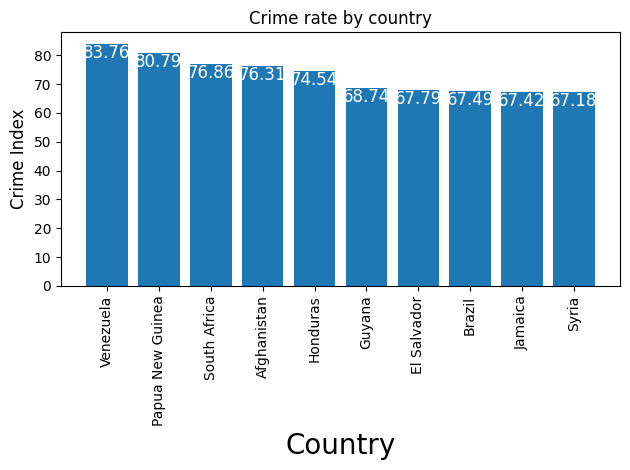

In [28]:
# Bar plot chart
Country=df.head(10)['Country']
Crime_Index=df.head(10)['Crime Index']

plt.bar(Country,Crime_Index)
plt.xlabel('Country', size='20')
plt.ylabel('Crime Index', size='12')
plt.title('Crime rate by country')
# Chart size
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':80})
# Countries rotation
plt.xticks(rotation=90)
plt.tight_layout()

# Labels for each bar
for x, y in zip(Country, Crime_Index):
    plt.text(x, y, str(y), ha='center', va='top', rotation=0, color='White', size='12')

plt.show()

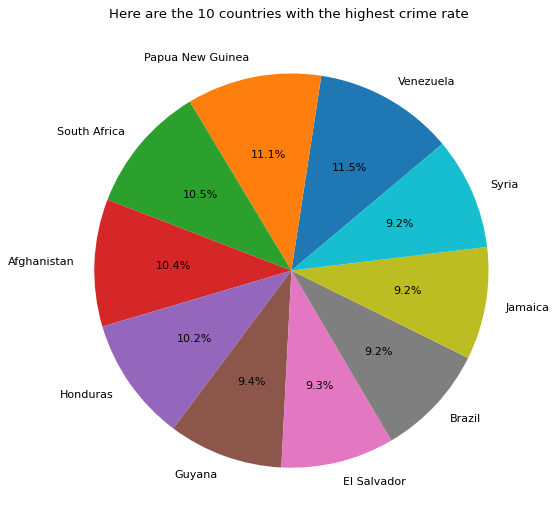

In [29]:
import matplotlib.pyplot as plt

# Sample data
Country = df.head(10)['Country']
Crime_Index = df.head(10)['Crime Index']  # Corresponding sizes for each category

# Create a pie chart
plt.pie(Crime_Index, labels=Country,autopct='%1.1f%%', startangle=40)

# Set the title
plt.title('Here are the 10 countries with the highest crime rate ')

# Display the plot
plt.show()

In [30]:
pip install geopandas matplotlib

<ipython-input-35-19cf7d460986>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


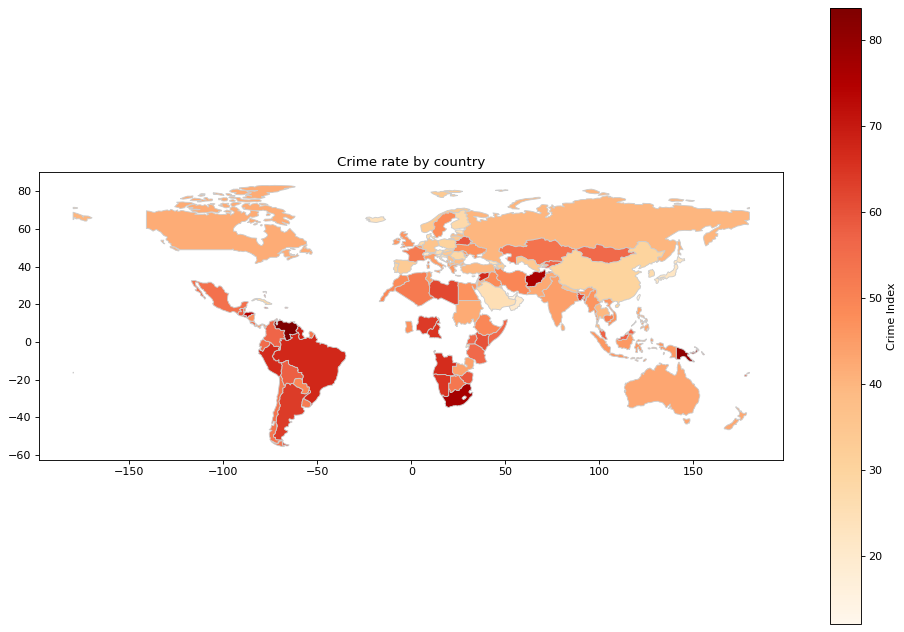

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your CSV file with country data
csv_file_path = '/content/crime_rate_by_country.csv'
country_data = pd.read_csv(csv_file_path)

# Merge the world map data with your CSV data using the country names
country_data= world.merge(country_data, how='left', left_on='name', right_on='Country')

# Plot the world map with your data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
country_data.plot(column='Crime Index', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='.8', legend=True, legend_kwds={'label': "Crime Index"})
ax.set_title('Crime rate by country')

# Show the plot
plt.show()




